**CHENNAI HOUSE PRICE PREDICTION**

In [ ]:
import pandas as pd
import numpy as np
import math
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import plotly.express as px


In [ ]:
hp = pd.read_csv("/content/train-chennai-sale.csv")
hp


,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [ ]:
hp.dropna(inplace=True)
hp.columns = hp.columns.str.lower()
hp.area = hp.area.str.lower()

In [ ]:
hp.area = hp.area.replace({'adyr':'adyar','ann nagar':'anna nagar','ana nagar':'anna nagar','chrmpet':'chrompet',
                           'chrompt':'chrompet', 'chormpet':'chrompet','kknagar':'kk nagar', 'karapakam':'karapakkam','tnagar':'t nagar', 
                        'velchery':'velachery'})

In [ ]:
hp.buildtype = hp.buildtype.str.lower()
hp.buildtype = hp.buildtype.replace({'comercial':'commercial', 'others':'other'})

In [ ]:
hp.utility_avail = hp.utility_avail.str.lower()
hp.utility_avail = hp.utility_avail.replace({'all pub':'allpub','nosewr':'nosewa'})

In [ ]:
hp.sale_cond = hp.sale_cond.str.lower()
hp.sale_cond = hp.sale_cond.replace({'ab normal':'abnormal','normal sale':'normal sale','adj land':'adjland','partiall':'partial'})

In [ ]:
hp.street = hp.street.str.lower()
hp.street = hp.street.replace({'pavd':'paved','noaccess':'no access'})

In [ ]:
hp.park_facil = hp.park_facil.str.lower()
hp.park_facil = hp.park_facil.replace({'noo':'no'})
hp.mzzone = hp.mzzone.str.lower()

In [ ]:
hp.n_bathroom = hp.n_bathroom.astype(int)
hp.n_bedroom = hp.n_bedroom.astype(int)

In [ ]:
hp.date_sale = pd.to_datetime(hp.date_sale, format='%d-%m-%Y')
hp.date_build = pd.to_datetime(hp.date_build, format='%d-%m-%Y')

In [ ]:
hp['property_age'] = pd.DatetimeIndex(hp.date_sale).year - pd.DatetimeIndex(hp.date_build).year
hp['total_price'] = pd.DataFrame(hp.reg_fee	+ hp.commis	+ hp.sales_price)

In [ ]:
hp = hp.reindex(columns = ['prt_id', 'area', 'sale_cond', 'park_facil','buildtype', 'utility_avail', 'street', 'mzzone', 'date_build', 'date_sale', 'property_age', 
       'int_sqft', 'dist_mainroad', 'n_bedroom','n_bathroom', 'n_room', 'qs_rooms', 'qs_bathroom', 'qs_bedroom', 'qs_overall', 'reg_fee', 'commis', 'sales_price', 'total_price'])

hp

,prt_id,area,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,date_build,date_sale,...,n_bathroom,n_room,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,reg_fee,commis,sales_price,total_price
0,P03210,karapakkam,abnormal,yes,commercial,allpub,paved,a,1967-05-15,2011-05-04,...,1,3,4.0,3.9,4.9,4.330,380000,144400,7600000,8124400
1,P09411,anna nagar,abnormal,no,commercial,allpub,gravel,rh,1995-12-22,2006-12-19,...,1,5,4.9,4.2,2.5,3.765,760122,304049,21717770,22781941
2,P01812,adyar,abnormal,yes,commercial,elo,gravel,rl,1992-02-09,2012-02-04,...,1,3,4.1,3.8,2.2,3.090,421094,92114,13159200,13672408
3,P05346,velachery,family,no,other,nosewr,paved,i,1988-03-18,2010-03-13,...,2,5,4.7,3.9,3.6,4.010,356321,77042,9630290,10063653
4,P06210,karapakkam,abnormal,yes,other,allpub,gravel,c,1979-10-13,2009-10-05,...,1,3,3.0,2.5,4.1,3.290,237000,74063,7406250,7717313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,karapakkam,adjland,no,other,elo,no access,rm,1962-01-15,2011-01-03,...,1,2,3.0,2.2,2.4,2.520,208767,107060,5353000,5668827
7105,P10000,velachery,family,yes,other,nosewa,no access,rh,1995-04-11,2004-04-08,...,2,5,3.6,4.5,3.3,3.920,346191,205551,10818480,11370222
7106,P09594,velachery,normal sale,no,house,nosewa,gravel,i,1978-09-01,2006-08-25,...,1,4,4.3,4.2,2.9,3.840,317354,167028,8351410,8835792
7107,P06508,karapakkam,partial,yes,commercial,elo,paved,rl,1977-08-11,2009-08-03,...,1,2,4.6,3.8,4.1,4.160,425350,119098,8507000,9051448


**EDA**

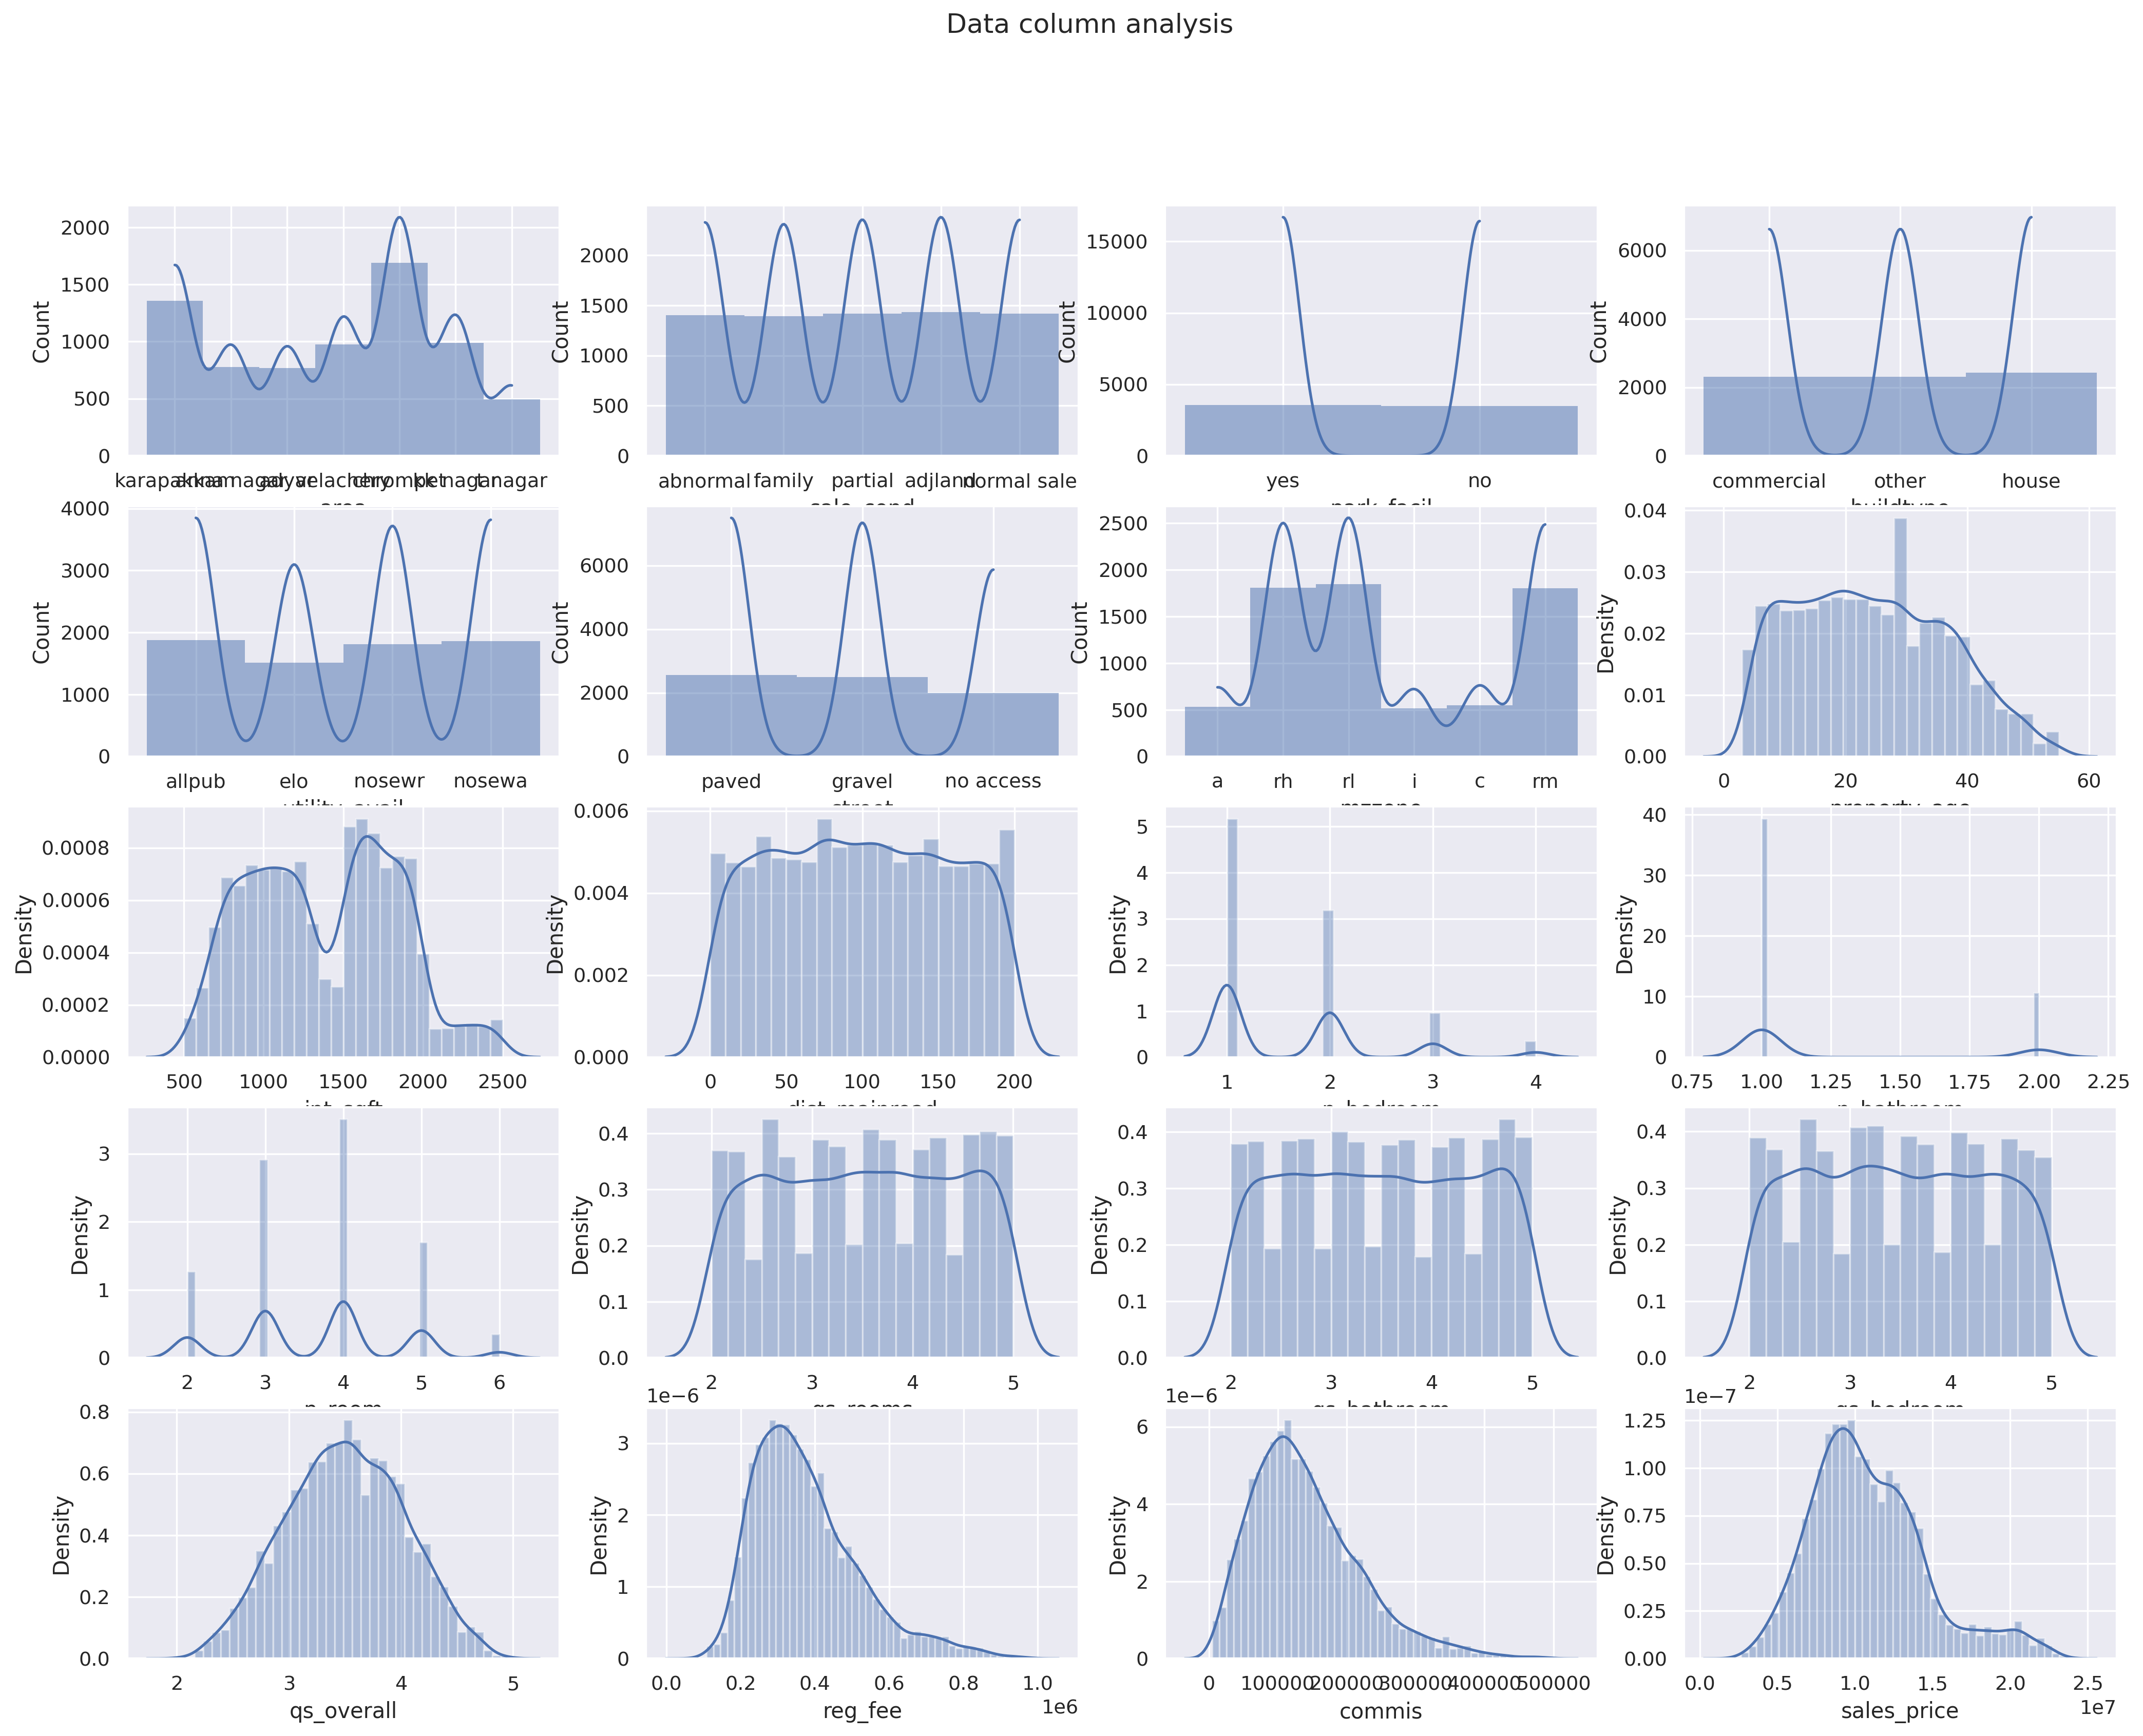

In [ ]:
plt.figure(figsize=(20, 15), dpi=250)  #try to swap the columns at the end
plt.suptitle("Data column analysis", fontsize=15)

plt.subplot(5,4,1)
sns.histplot(hp.area, linewidth=0,kde=True)

plt.subplot(5,4,2)
sns.histplot(hp.sale_cond, linewidth=0,kde=True)

plt.subplot(5,4,3)
sns.histplot(hp.park_facil, linewidth=0,kde=True)

plt.subplot(5,4,4)
sns.histplot(hp.buildtype, linewidth=0,kde=True)

plt.subplot(5,4,5)
sns.histplot(hp.utility_avail, linewidth=0,kde=True)

plt.subplot(5,4,6)
sns.histplot(hp.street, linewidth=0,kde=True)

plt.subplot(5,4,7)
sns.histplot(hp.mzzone, linewidth=0,kde=True)

plt.subplot(5,4,8)
sns.distplot(hp.property_age)

plt.subplot(5,4,9)
sns.distplot(hp.int_sqft)

plt.subplot(5,4,10)
sns.distplot(hp.dist_mainroad)

plt.subplot(5,4,11)
sns.distplot(hp.n_bedroom)

plt.subplot(5,4,12)
sns.distplot(hp.n_bathroom)

plt.subplot(5,4,13)
sns.distplot(hp.n_room)

plt.subplot(5,4,14)
sns.distplot(hp.qs_rooms)

plt.subplot(5,4,15)
sns.distplot(hp.qs_bathroom)

plt.subplot(5,4,16)
sns.distplot(hp.qs_bedroom)

plt.subplot(5,4,17)
sns.distplot(hp.qs_overall)

plt.subplot(5,4,18)
sns.distplot(hp.reg_fee)

plt.subplot(5,4,19)
sns.distplot(hp.commis)

plt.subplot(5,4,20)
sns.distplot(hp.sales_price)
plt.show()


Ploting Target and Categorical

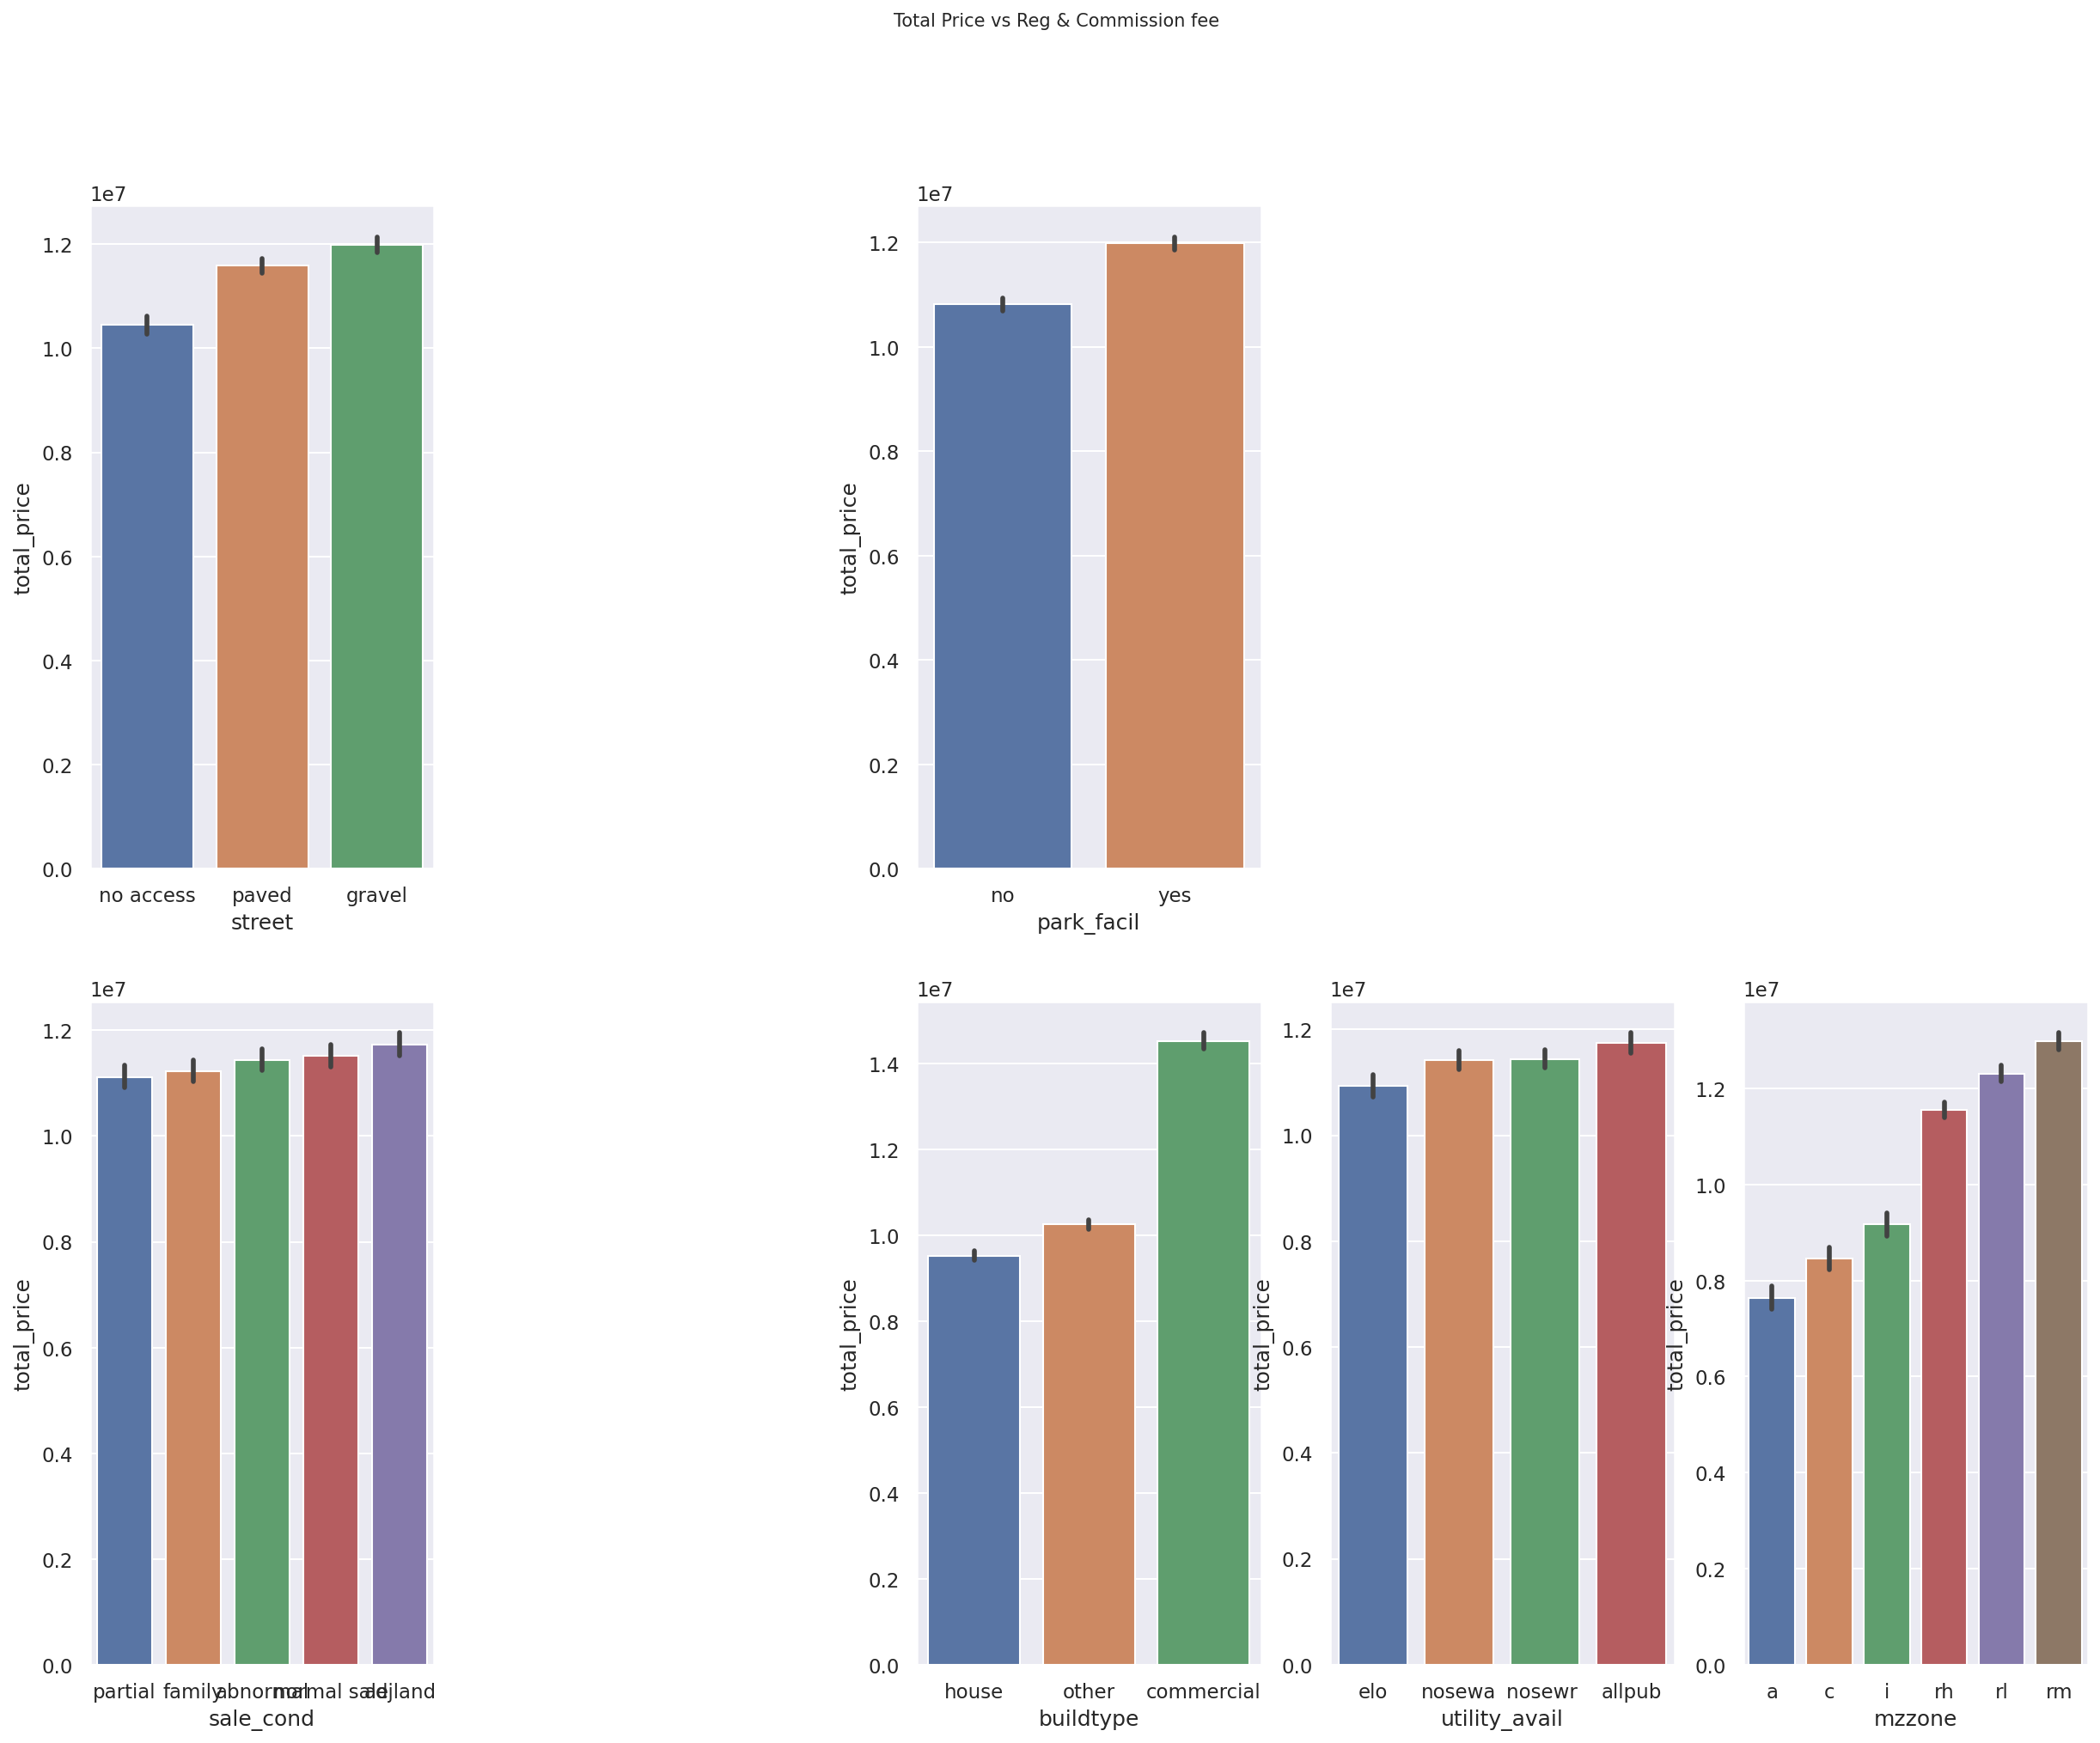

In [ ]:
plt.figure(figsize=(20, 15), dpi=150)
plt.suptitle("Total Price vs Reg & Commission fee", fontsize=10)

plt.subplot2grid((2,5),(0,0))
sns.barplot(x=hp.street,y=hp.total_price,order=hp.groupby('street')['total_price'].mean().reset_index().sort_values('total_price')['street'])

plt.subplot2grid((2,5),(0,2))
sns.barplot(x=hp.park_facil,y=hp.total_price,order=hp.groupby('park_facil')['total_price'].mean().reset_index().sort_values('total_price')['park_facil'])

plt.subplot2grid((2,5),(1,0))
sns.barplot(x=hp.sale_cond,y=hp.total_price,order=hp.groupby('sale_cond')['total_price'].mean().reset_index().sort_values('total_price')['sale_cond'])

plt.subplot2grid((2,5),(1,2))
sns.barplot(x=hp.buildtype,y=hp.total_price,order=hp.groupby('buildtype')['total_price'].mean().reset_index().sort_values('total_price')['buildtype'])

plt.subplot2grid((2,5),(1,3))
sns.barplot(x=hp.utility_avail,y=hp.total_price,order=hp.groupby('utility_avail')['total_price'].mean().reset_index().sort_values('total_price')['utility_avail'])

plt.subplot2grid((2,5),(1,4))
sns.barplot(x=hp.mzzone,y=hp.total_price,order=hp.groupby('mzzone')['total_price'].mean().reset_index().sort_values('total_price')['mzzone'])
plt.show()

Plotting Dicrete numeric

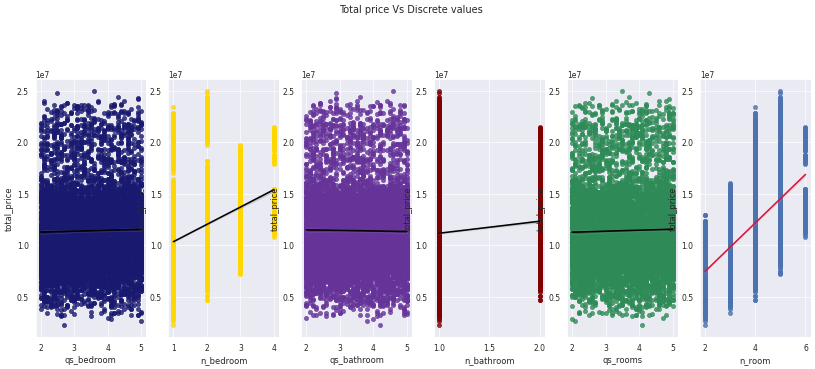

In [ ]:
plt.figure(figsize=(20, 15), dpi=50)
plt.suptitle("Total price Vs Discrete values", fontsize=14)
plt.bar(x_pos, height, color=['black', 'red', 'green', 'blue', 'cyan'])

plt.subplot2grid(shape=(2,6),loc=(0,0)) # Shape: total 6 plots arranged in 2 rows and 6 columns
sns.regplot(hp.qs_bedroom, hp.total_price, scatter_kws={"color": "midnightblue"}, line_kws={"color": "black"})

plt.subplot2grid(shape=(2,6),loc=(0,1))
sns.regplot(hp.n_bedroom, hp.total_price, scatter_kws={"color": "gold"}, line_kws={"color": "black"})

plt.subplot2grid(shape=(2,6),loc=(0,2))
sns.regplot(hp.qs_bathroom, hp.total_price, scatter_kws={"color": "rebeccapurple"}, line_kws={"color": "black"})

plt.subplot2grid(shape=(2,6),loc=(0,3))
sns.regplot(hp.n_bathroom, hp.total_price, scatter_kws={"color": "maroon"}, line_kws={"color": "black"})

plt.subplot2grid(shape=(2,6),loc=(0,4))
sns.regplot(hp.qs_rooms, hp.total_price, scatter_kws={"color": "seagreen"}, line_kws={"color": "black"})

plt.subplot2grid(shape=(2,6),loc=(0,5))
sns.regplot(hp.n_room, hp.total_price, line_kws={"color": "crimson"})

plt.show()

Plotting Continous numeric

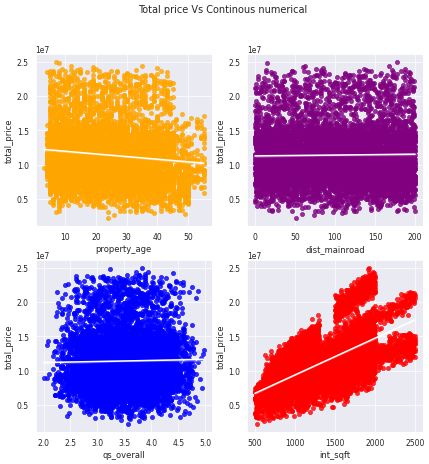

In [ ]:
plt.figure(figsize=(10, 10), dpi=50)
plt.suptitle("Total price Vs Continous numerical", fontsize=14)

plt.subplot(2,2,1)
sns.regplot(hp.property_age, hp.total_price, scatter_kws={"color": "orange"}, line_kws={"color": "white"})
plt.subplot(2,2,2)
sns.regplot(hp.dist_mainroad, hp.total_price, scatter_kws={"color": "purple"}, line_kws={"color": "white"})
plt.subplot(2,2,3)
sns.regplot(hp.qs_overall, hp.total_price, scatter_kws={"color": "blue"}, line_kws={"color": "white"})
plt.subplot(2,2,4)
sns.regplot(hp.int_sqft, hp.total_price, scatter_kws={"color": "red"}, line_kws={"color": "white"})
plt.show()

Plotting Commision & Registration fee VS Total price

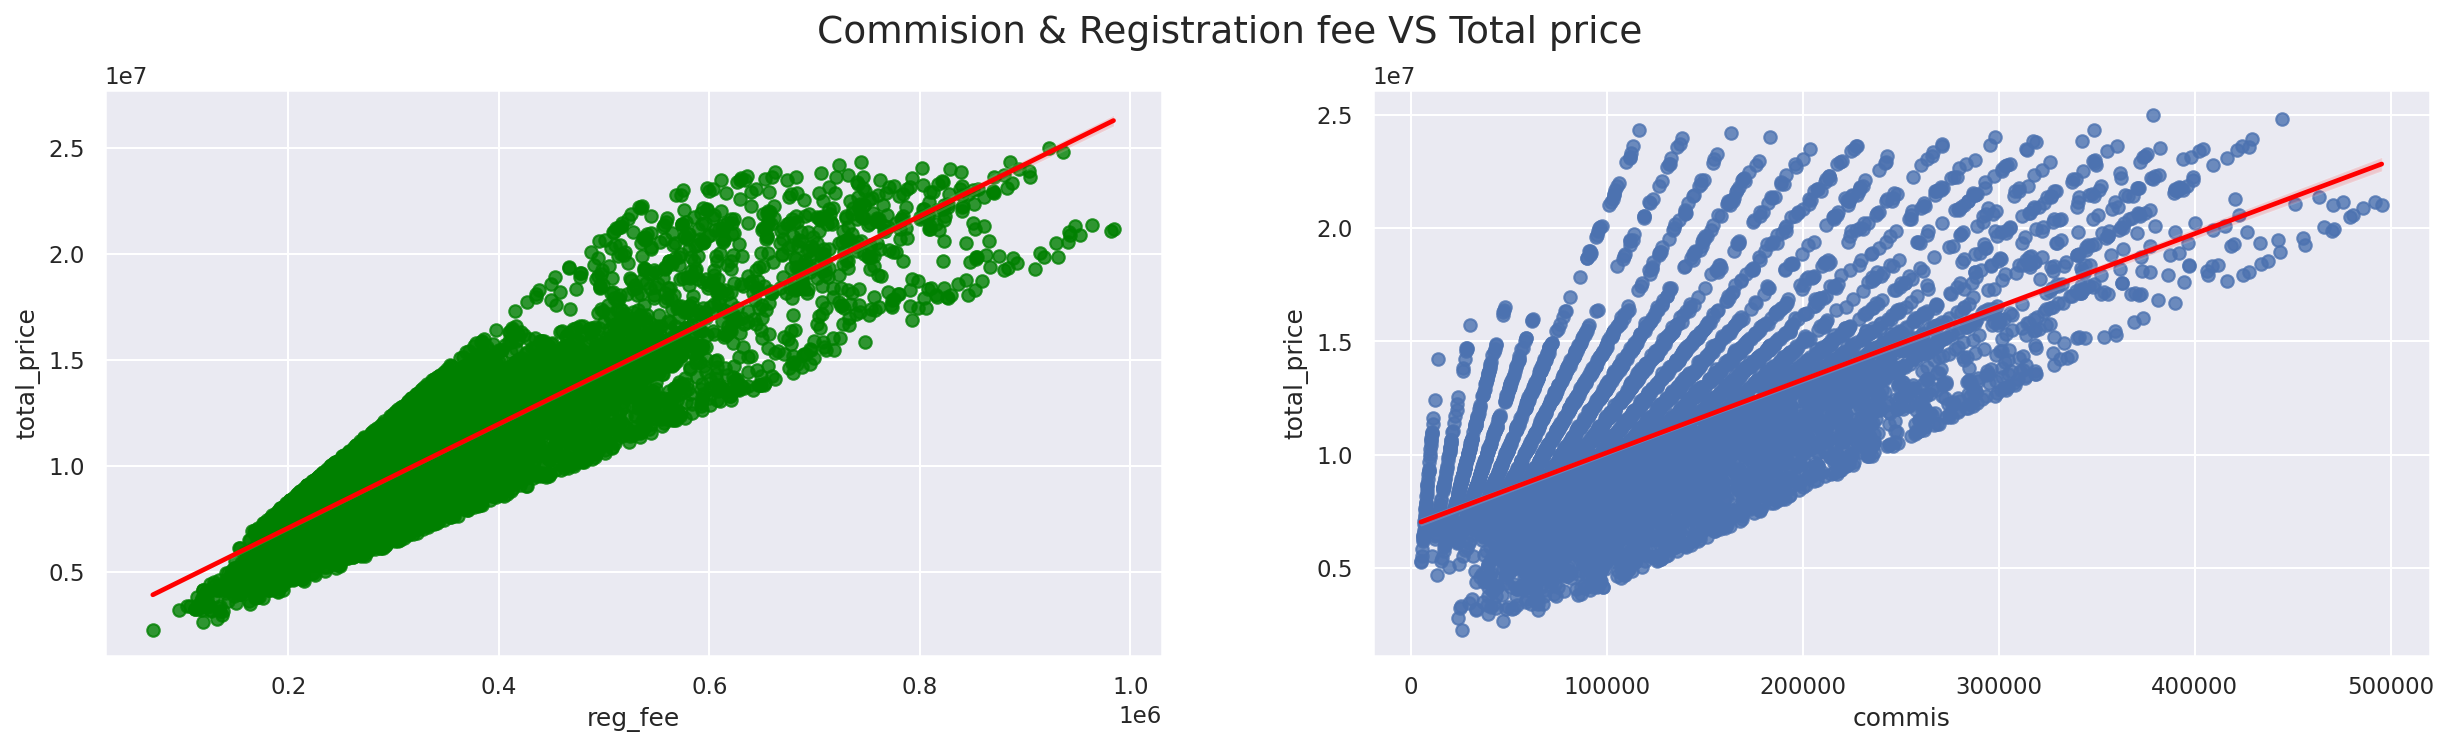

In [ ]:
plt.figure(figsize=(20, 5), dpi=150)

plt.subplot(1,2,1)
sns.regplot(hp.reg_fee, hp.total_price, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.subplot(1,2,2)
sns.regplot(hp.commis, hp.total_price, line_kws={"color": "red"})

plt.suptitle("Commision & Registration fee VS Total price", fontsize=18)
plt.show()

Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
hp.area = hp.area.map({'karapakkam': 1,'adyar': 2, 'chrompet' : 3,'velachery' : 4,'kk nagar' : 5, 'anna nagar' : 6,'t nagar' : 7})

hp.utility_avail = hp.utility_avail.map({'elo' : 1, 'nosewa' : 2, 'nosewr ' : 3,'allpub' : 4})

hp.mzzone = hp.mzzone.map({'a' : 1,'c' : 2,'i' : 3,'rl' : 5,'rh' : 4,'rm' : 6})

hp.sale_cond = hp.sale_cond.map({'partial' : 1, 'family' : 2,'abnormal' : 3,'normal sale' : 4,'adjland' : 5})

hp.street = hp.street.map({'no access' : 1,'paved' : 2,'gravel' : 3})

hp.park_facil = hp.park_facil.map({'yes':1,'no':0})

In [ ]:
hp = pd.get_dummies(hp,columns=['buildtype'])

In [ ]:

hp = hp.reindex(columns = ['area', 'sale_cond', 'park_facil','buildtype_commercial', 'buildtype_house','buildtype_other', 'utility_avail','street', 'mzzone', 'property_age', 'int_sqft', 'dist_mainroad', 'n_bedroom',
       'n_bathroom', 'n_room', 'qs_rooms', 'qs_bathroom', 'qs_bedroom','qs_overall', 'reg_fee', 'commis', 'sales_price', 'total_price'])

In [ ]:
hp.head(3)

,area,sale_cond,park_facil,buildtype_commercial,buildtype_house,buildtype_other,utility_avail,street,mzzone,property_age,...,n_bathroom,n_room,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,reg_fee,commis,sales_price,total_price
0,1,3,1,1,0,0,4,2,1,44,...,1,3,4.0,3.9,4.9,4.330,380000,144400,7600000,8124400
1,6,3,0,1,0,0,4,3,4,11,...,1,5,4.9,4.2,2.5,3.765,760122,304049,21717770,22781941
2,2,3,1,1,0,0,1,3,5,20,...,1,3,4.1,3.8,2.2,3.090,421094,92114,13159200,13672408


In [ ]:

df = hp.copy()
df.drop(['qs_overall', 'dist_mainroad', 'qs_overall','qs_rooms', 'qs_bathroom', 'qs_bedroom', 'reg_fee',	'commis'], axis=1, inplace=True)

In [ ]:
input_cols = ['area', 'sale_cond', 'park_facil', 'buildtype_commercial',	'buildtype_house',
              'buildtype_other', 'utility_avail', 'street', 'mzzone', 'property_age',
              'int_sqft', 'n_bedroom', 'n_bathroom', 'n_room']

target_cols = 'sales_price'
target1_cols = 'total_price'

input = df[input_cols].copy()
target = df[target_cols].copy()
target1 = df[target1_cols].copy()

Training and spliting the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state = 4)

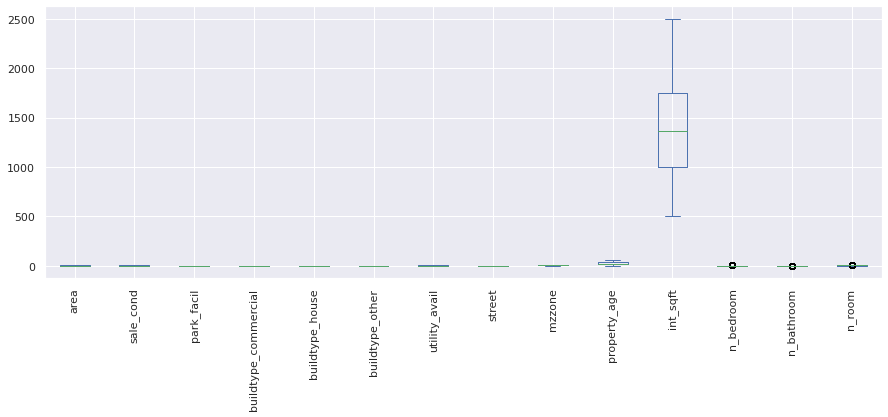

In [ ]:
pd.DataFrame(X_train, columns=X_train.columns).plot.box(figsize=(15,5), rot=90)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

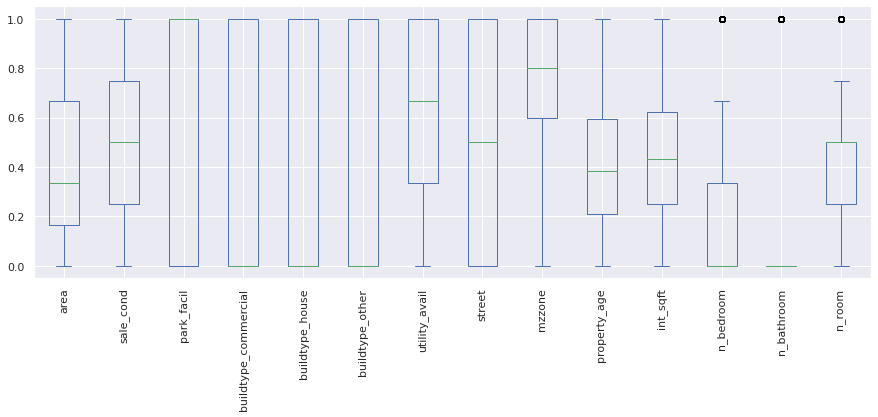

In [ ]:
minmax = MinMaxScaler().fit(X_train)
X_train_minmax = minmax.transform(X_train)
X_train_minmax = pd.DataFrame(X_train_minmax, columns=X_train.columns)
X_test_minmax = minmax.transform(X_test)
X_test_minmax = pd.DataFrame(X_test_minmax, columns=X_test.columns)
X_train_minmax.plot.box(figsize=(15,5), rot=90)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

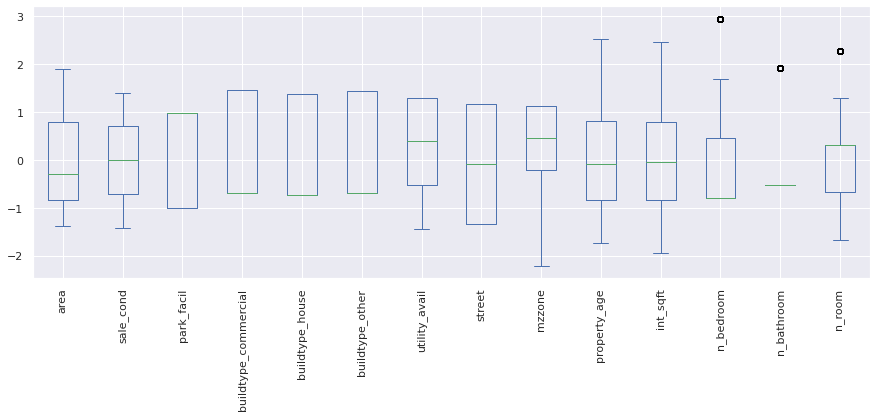

In [ ]:
std = StandardScaler().fit(X_train)
X_train_std = std.transform(X_train)
X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)
X_test_std = std.transform(X_test)
X_test_std = pd.DataFrame(X_test_std, columns=X_test.columns)
X_train_std.plot.box(figsize=(15,5), rot=90)
plt.show()

Linear Regression:

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn import tree
import xgboost as xgb

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('R2 SCORE:', metrics.r2_score(y_test,y_pred))

lr.fit(X_train_std, y_train)
y_predlrss = lr.predict(X_test_std)
print('R2 SCORE(Standardscaler):', metrics.r2_score(y_test,y_predlrss))

lr.fit(X_train_minmax, y_train)
y_predlrmm = lr.predict(X_test_minmax)
print('R2 SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_predlrmm))

R2 SCORE: 0.9277207406930034
R2 SCORE(Standardscaler): 0.9277207406930034
R2 SCORE(Minmaxscaled): 0.9277207406930036


Decision Tree

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('R2 SCORE:', metrics.r2_score(y_test,y_pred_dt))

dt.fit(X_train_minmax, y_train)
y_pred_dtmm = dt.predict(X_test_minmax)
print('R2 SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_pred_dtmm))

dt.fit(X_train_std, y_train)
y_pred_dtss = dt.predict(X_test_std)
print('R2 SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_dtss))

R2 SCORE: 0.9741981023877514
R2 SCORE(Minmaxscaled): 0.973704964055297
R2 SCORE(Standardscaler): 0.9734084417319164


Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators= 100, max_depth = 15, max_features='sqrt')
rf.fit(X_train, y_train);
y_pred_rf = rf.predict(X_test)
print('R2 SCORE:', metrics.r2_score(y_test,y_pred_rf))

rf.fit(X_train_minmax, y_train);
y_pred_rfmm = rf.predict(X_test_minmax)
print('R2 SCORE(minmaxscaled):', metrics.r2_score(y_test,y_pred_rfmm))

rf.fit(X_train_std, y_train);
y_pred_rfss = rf.predict(X_test_std)
print('R2 SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_rfss))

R2 SCORE: 0.9874268649304117
R2 SCORE(minmaxscaled): 0.9878825466283117
R2 SCORE(Standardscaler): 0.9875685375476555


Extra Tree Regressor

In [ ]:
etr = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)
y_pred_etr = etr.predict(X_test)
print('R2 SCORE:', metrics.r2_score(y_test,y_pred_etr))

y_pred_etrmm = etr.predict(X_test_minmax)
print('R2 SCORE(minmaxscaled):', metrics.r2_score(y_test,y_pred_etrmm))

y_pred_etrss = etr.predict(X_test_std)
print('R2 SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_etrss))

R2 SCORE: 0.9920445065670085
R2 SCORE(minmaxscaled): -3.131502511044763
R2 SCORE(Standardscaler): -2.625412537706705


KNearestNeighbors

In [ ]:
knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(X_train, y_train)
y_predknn = knn.predict(X_test)
print('R2 SCORE:', metrics.r2_score(y_test,y_predknn))

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_minmax, y_train)
y_predknn_minmax = knn.predict(X_test_minmax)
print('R2 SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_predknn_minmax))

knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train_std, y_train)
y_predknn_std = knn.predict(X_test_std)
print('R2 SCORE(Standardscaler):', metrics.r2_score(y_test,y_predknn_std))

R2 SCORE: 0.40820040095519017
R2 SCORE(Minmaxscaled): 0.9362621450399536
R2 SCORE(Standardscaler): 0.9548340464575912


Ensamble Learning 

In [ ]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor(n_estimators= 150, max_depth = 20, max_features='sqrt')
etr = ExtraTreesRegressor(n_estimators=150, random_state=0).fit(X_train, y_train)
knn = KNeighborsRegressor(n_neighbors=150)
gbr = GradientBoostingRegressor(learning_rate=.5)
xg = xgb.XGBRegressor(learning_rate = .7, n_estimators=100, verbosity = 0)

vr = VotingRegressor([('dt', dt), ('knn', knn), ('lr', lr), ('rf', rf), ('xg', xg), ('gbr', gbr), ('etr', etr)])

vr.fit(X_train, y_train);
y_pred_vr = vr.predict(X_test)
print('R2 SCORE:', metrics.r2_score(y_test,y_pred_vr))

vr.fit(X_train_std, y_train);
y_pred_vrstd = vr.predict(X_test_std)
print('R2 SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_vrstd))

vr.fit(X_train_minmax, y_train);
y_pred_vrminmax = vr.predict(X_test_minmax)
print('R2 SCORE(MinMaxScaler):', metrics.r2_score(y_test,y_pred_vr))

R2 SCORE: 0.97825537629928
R2 SCORE(Standardscaler): 0.9897622151468077
R2 SCORE(MinMaxScaler): 0.97825537629928


Gradient Boosting Regressor

In [ ]:
for lr in [0.01,0.02,0.03,0.04,0.05]:
  model= GradientBoostingRegressor(learning_rate=lr)
  model.fit(X_train, y_train)
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Test score : ", model.score(X_test,y_test))

Learning rate :  0.01  Train score :  0.7416156272511132  Test score :  0.7434360150532486
Learning rate :  0.02  Train score :  0.8935674169610637  Test score :  0.8934364887590497
Learning rate :  0.03  Train score :  0.9433261349035145  Test score :  0.9426345464057557
Learning rate :  0.04  Train score :  0.9643958296431434  Test score :  0.963831085090452
Learning rate :  0.05  Train score :  0.974412280243185  Test score :  0.9742133351379562


In [ ]:
gbr = GradientBoostingRegressor(learning_rate=.5)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
print('R2 SCORE:', metrics.r2_score(y_test,y_pred_gbr))

gbr.fit(X_train_minmax, y_train)
y_pred_gbrmm = gbr.predict(X_test_minmax)
print('R2 SCORE(MinMaxScaler):', metrics.r2_score(y_test,y_pred_gbrmm))

gbr.fit(X_train_std, y_train)
y_pred_gbrss = gbr.predict(X_test_std)
print('R2 SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_gbrss))

R2 SCORE: 0.9967876847414066
R2 SCORE(MinMaxScaler): 0.9967832786062732
R2 SCORE(Standardscaler): 0.9967798523997543


XG Boost

In [ ]:
for lr in [0.5,0.4,0.3,0.2,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(X_train, y_train)
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Test score : ", model.score(X_test,y_test))

Learning rate :  0.5  Train score :  0.9970521426782128  Test score :  0.9965745393942189
Learning rate :  0.4  Train score :  0.9977554065754  Test score :  0.9971969772220864
Learning rate :  0.3  Train score :  0.9968653432067255  Test score :  0.9966318408686627
Learning rate :  0.2  Train score :  0.9964383028314174  Test score :  0.9960659947770572
Learning rate :  1  Train score :  0.9977100908663054  Test score :  0.9968126495631916


In [ ]:
xg = xgb.XGBRegressor(learning_rate = .7, n_estimators=100, verbosity = 0)
xg.fit(X_train, y_train)
y_pred_gbr = xg.predict(X_test)
print('R2 SCORE:', metrics.r2_score(y_test,y_pred_gbr))

xg.fit(X_train_minmax, y_train)
y_pred_gbrminmax = xg.predict(X_test_minmax)
print('R2 SCORE(MinMaxScaler):', metrics.r2_score(y_test,y_pred_gbrminmax))

xg.fit(X_train_std, y_train)
y_pred_gbrstd = xg.predict(X_test_std)
print('R2 SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_gbrstd))

R2 SCORE: 0.9973993824490377
R2 SCORE(MinMaxScaler): 0.9973992126508857
R2 SCORE(Standardscaler): 0.9973993824490377


SOLUTION

In this House price prediction project, we can observe that the model which i'd used above has given best possible RSsquare values. First we have started with to clean the data to make sure there are no such outliers and as we can see there are few mispelled data's are there in the dataset and we have corrected that one as well.
And we have performed exploratory data analysis(EDA)  to analyze the data using visual techniques and to discover the trends, patterns.
Both Label and Onehot encoding were performed for ordinal and nominal data. After that we were trained and split the data's and performed scaling to normalize the range of independent variables or features of data. 
After all this, we've trained numerous machine learning model like Linear regression, Decision tree, Ensamble learning etc., and we have got best RS square values such as 0.99% hence we can finalise the model.
